<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Machine learning : Testing Models </h1></center>

----------------------------

<center> <h1> Naive Bayes classification with added variables </h1> </center>

In [62]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../")
import utils

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

## Loading data

In [63]:
CI02 = utils.load_data("../data/for_learning_plus/CI02.npy")
CI04 = utils.load_data("../data/for_learning_plus/CI04.npy")
CI06 = utils.load_data("../data/for_learning_plus/CI06.npy")
CI09 = utils.load_data("../data/for_learning_plus/CI09.npy")
CI21 = utils.load_data("../data/for_learning_plus/CI21.npy")

# Classification with learning on CI02

In [64]:
data = CI02

### Spliting dataset to train/test

In [68]:
X = data[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 

y = data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

In [66]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Apply Gaussian NB classifier

In [70]:
clf = GaussianNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Evaluation of the prediction

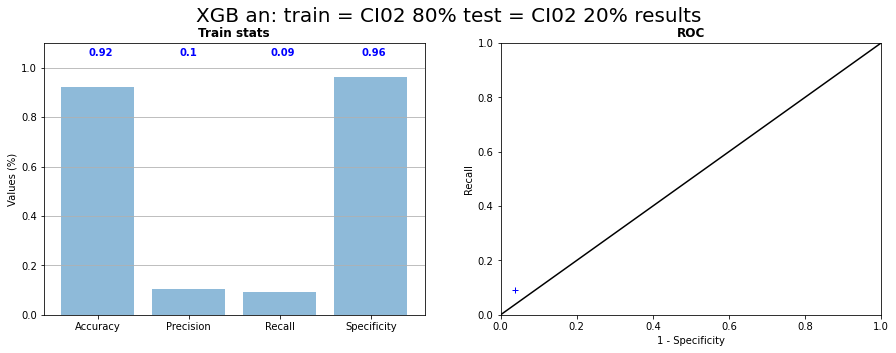

In [34]:
acc =metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="XGB an: train = CI02 80% test = CI02 20%")

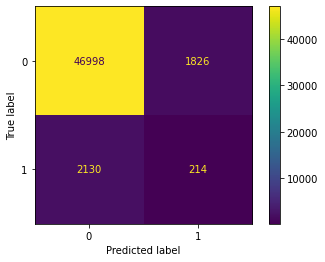

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) 
plt.show()

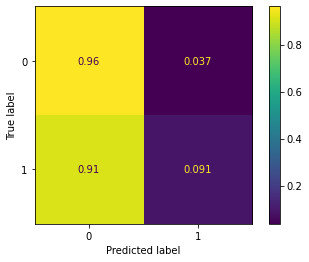

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize="true")  
plt.show()

### Projection of test set

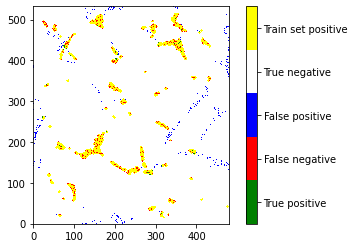

In [37]:
im_shape = np.shape(np.load("../data/for_learning_plus/CI02.npy"))
utils.plot_pred_proj(y_pred,y_test,im_shape,y_train)

## Predict on CI02

In [50]:
X_val = CI02[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 
y_val = CI02['Y'] 

X_val = sc.transform(X_val)

In [51]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

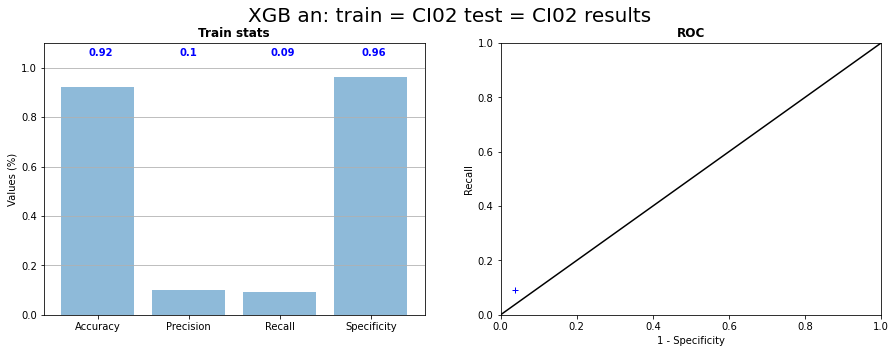

In [52]:
acc =metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="XGB an: train = CI02 test = CI02")

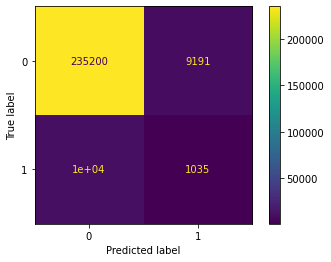

In [53]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()

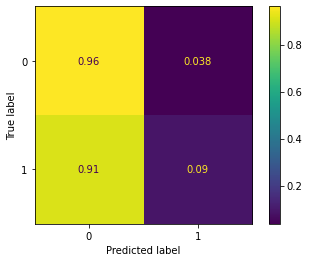

In [54]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

### Projection of train/test set

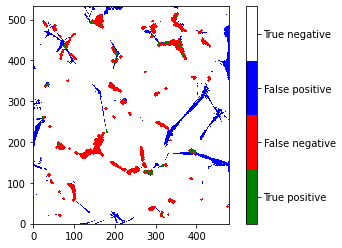

In [55]:
im_shape = np.shape(np.load("../data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

## Predict on CI04

In [56]:
X_val = CI04[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 
y_val = CI04['Y'] 

X_val = sc.transform(X_val)

In [57]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

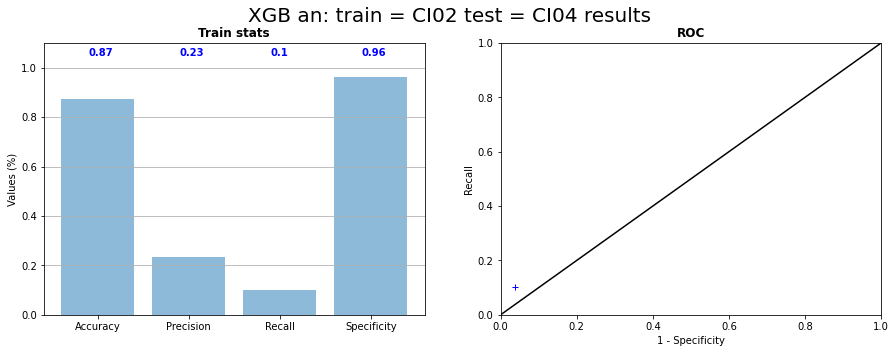

In [58]:
acc =metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="XGB an: train = CI02 test = CI04")

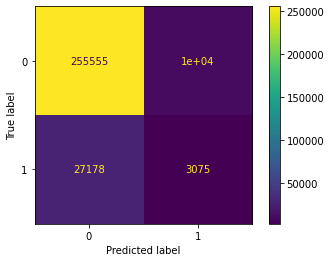

In [59]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()

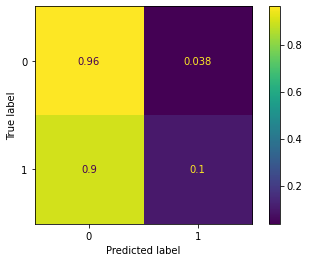

In [60]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

### Projection of validation set

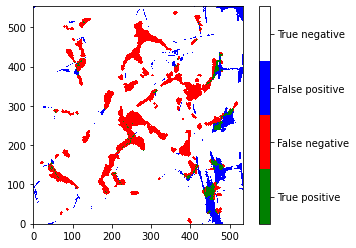

In [61]:
im_shape = np.shape(np.load("../data/for_learning_plus/CI04.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)